<a href="https://colab.research.google.com/github/G4zele/Deep-Learning/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers

%matplotlib inline

In [396]:
data = pd.read_csv("/content/video_games_sales.csv")

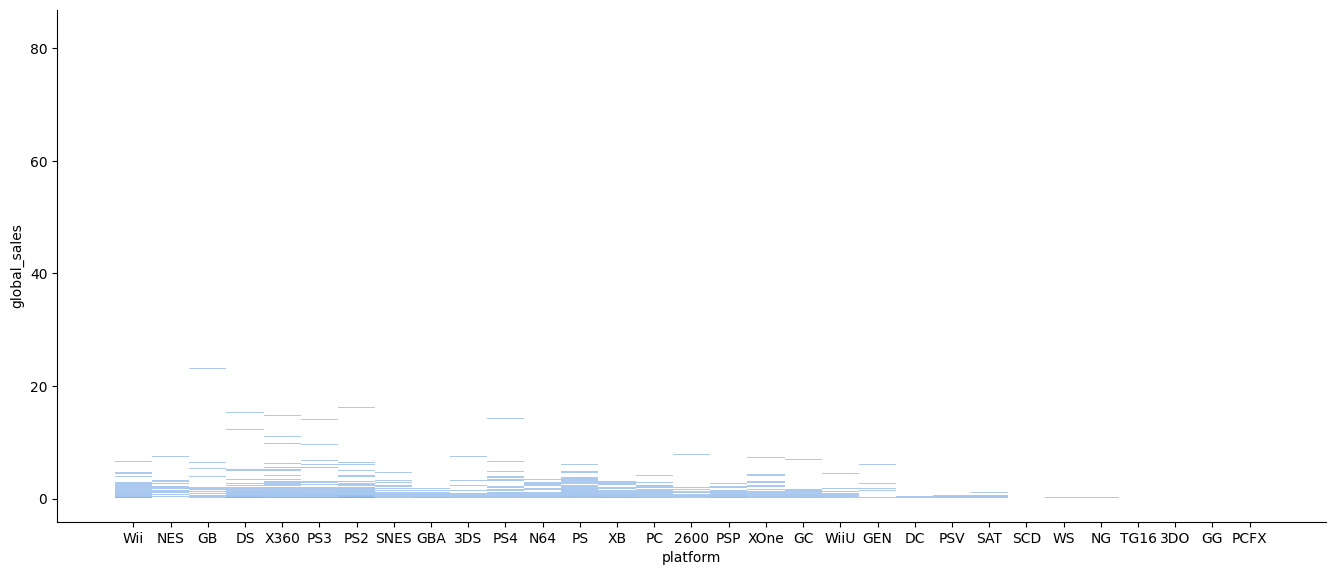

In [418]:
graph_1 = sns.displot(
    data=data,
    x="platform", y="global_sales",
)
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.show()

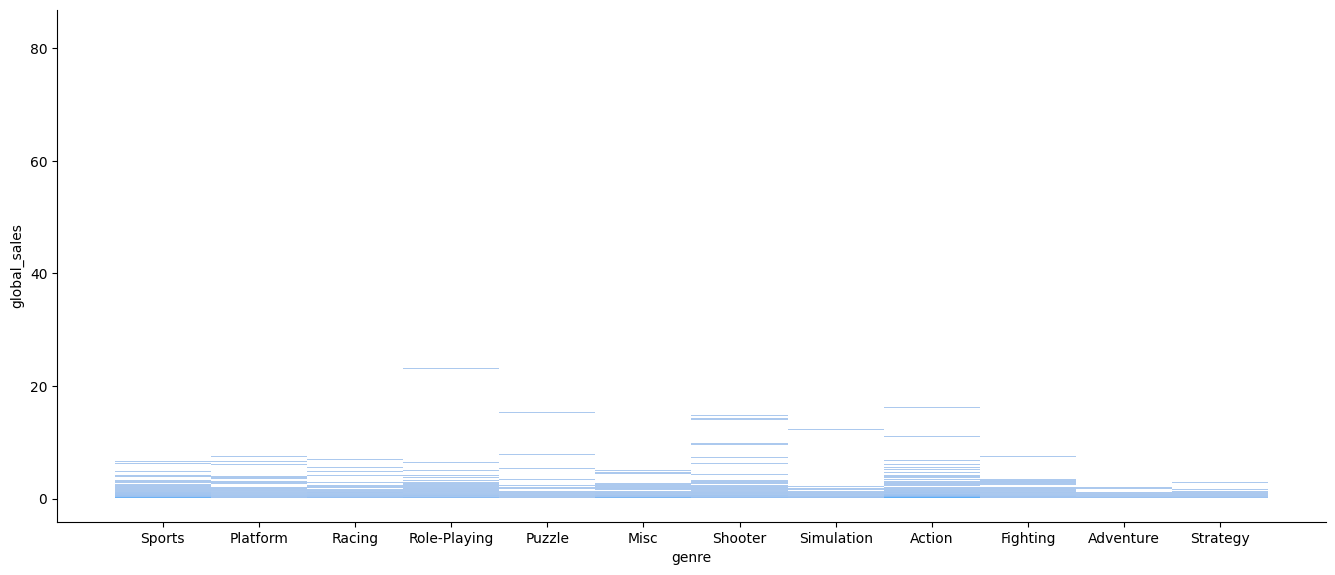

In [419]:
graph_1 = sns.displot(
    data=data,
    x="genre", y="global_sales",
)
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.show()

In [397]:
X = data.drop(['name','rank','na_sales','year',	'eu_sales',	'jp_sales',	'other_sales', 'global_sales'],axis=1)
Y = data['global_sales']

In [398]:
from sklearn.preprocessing import LabelEncoder
le_platform = LabelEncoder()
le_genre = LabelEncoder()
le_publisher = LabelEncoder()

X_platform_encoded = le_platform.fit_transform(X['platform'])
X_genre_encoded = le_genre.fit_transform(X['genre'])
X_publisher_encoded = le_publisher.fit_transform(X['publisher'])

platform_dict = dict(zip(le_platform.transform(le_platform.classes_), le_platform.classes_))
genre_dict = dict(zip(le_genre.transform(le_genre.classes_), le_genre.classes_))
publisher_dict = dict(zip(le_publisher.transform(le_publisher.classes_), le_publisher.classes_))


X['platform'] = X_platform_encoded
X['genre'] = X_genre_encoded
X['publisher'] = X_publisher_encoded

In [399]:
X_train.head(5)

,platform,genre,publisher
14328,13,3,390
2037,29,10,138
486,16,2,488
15405,19,1,109
8762,2,0,525


In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [430]:
X_train.head()

,platform,genre,publisher
14303,19,3,340
13455,4,9,525
6724,17,0,446
898,13,9,138
8484,4,7,465


In [431]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13278 entries, 14303 to 15795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   platform   13278 non-null  int64
 1   genre      13278 non-null  int64
 2   publisher  13278 non-null  int64
dtypes: int64(3)
memory usage: 414.9 KB


In [432]:
X_train.isna().all()

platform     False
genre        False
publisher    False
dtype: bool

In [433]:
y_train.head()

14303   0.03000
13455   0.04000
6724    0.25000
898     1.92000
8484    0.16000
Name: global_sales, dtype: float64

In [434]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [435]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
device_name

''

In [436]:
def create_model(activation='relu', optimizer='adam', neurons=32):
  with tf.device(device_name):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1]))
    model.add(tf.keras.layers.Dense(neurons, activation=activation))
    model.add(tf.keras.layers.Dense(neurons, activation=activation))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [456]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'neurons': [16, 32, 64],
    'batch_size': [32, 64],
    'epochs': [50],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh']
}

model = KerasRegressor(build_fn=create_model)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, verbose=2)
grid_result = grid.fit(X_train, y_train)

print(f"Лучшие параметры: {grid.best_params_}")
print(f"Лучший результат: {grid.best_score_}")

Fitting 2 folds for each of 24 candidates, totalling 48 fits
Epoch 1/50


<ipython-input-456-97de74a05359>:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model)


208/208 [==============================] - 1s 2ms/step - loss: 26.7352
Epoch 2/50
208/208 [==============================] - 0s 2ms/step - loss: 2.5893
Epoch 3/50
208/208 [==============================] - 0s 2ms/step - loss: 2.5509
Epoch 4/50
208/208 [==============================] - 1s 3ms/step - loss: 2.5087
Epoch 5/50
208/208 [==============================] - 1s 3ms/step - loss: 2.5436
Epoch 6/50
208/208 [==============================] - 1s 3ms/step - loss: 2.5062
Epoch 7/50
208/208 [==============================] - 1s 3ms/step - loss: 2.5398
Epoch 8/50
208/208 [==============================] - 1s 3ms/step - loss: 2.5620
Epoch 9/50
208/208 [==============================] - 0s 2ms/step - loss: 2.6278
Epoch 10/50
208/208 [==============================] - 0s 2ms/step - loss: 2.5919
Epoch 11/50
208/208 [==============================] - 0s 2ms/step - loss: 2.5319
Epoch 12/50
208/208 [==============================] - 0s 2ms/step - loss: 2.5925
Epoch 13/50
208/208 [==============

In [457]:
model = create_model()
history = model.fit(X_train, 
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=64,
                    use_multiprocessing=True,
                    workers=4,
                    verbose=2)

Epoch 1/50
208/208 - 1s - loss: 44.3795 - val_loss: 4.3763 - 1s/epoch - 6ms/step
Epoch 2/50
208/208 - 0s - loss: 2.0812 - val_loss: 4.3716 - 403ms/epoch - 2ms/step
Epoch 3/50
208/208 - 0s - loss: 2.0563 - val_loss: 4.2311 - 412ms/epoch - 2ms/step
Epoch 4/50
208/208 - 1s - loss: 2.0491 - val_loss: 4.1981 - 726ms/epoch - 3ms/step
Epoch 5/50
208/208 - 1s - loss: 2.0973 - val_loss: 4.3263 - 768ms/epoch - 4ms/step
Epoch 6/50
208/208 - 1s - loss: 2.0704 - val_loss: 4.1972 - 1s/epoch - 6ms/step
Epoch 7/50
208/208 - 1s - loss: 2.0581 - val_loss: 4.1864 - 1s/epoch - 5ms/step
Epoch 8/50
208/208 - 1s - loss: 2.0328 - val_loss: 4.3863 - 877ms/epoch - 4ms/step
Epoch 9/50
208/208 - 1s - loss: 2.0309 - val_loss: 4.3711 - 1s/epoch - 5ms/step
Epoch 10/50
208/208 - 1s - loss: 2.0777 - val_loss: 4.2035 - 904ms/epoch - 4ms/step
Epoch 11/50
208/208 - 1s - loss: 2.1428 - val_loss: 4.5902 - 646ms/epoch - 3ms/step
Epoch 12/50
208/208 - 0s - loss: 2.0918 - val_loss: 4.1913 - 427ms/epoch - 2ms/step
Epoch 13/50


In [458]:
y_pred = model.predict(X_test_scaled)

104/104 [==============================] - 0s 1ms/step


In [459]:
model.evaluate(X_test_scaled, y_test)

104/104 [==============================] - 0s 2ms/step - loss: 4.3831


4.383090019226074

In [460]:
input_data = pd.DataFrame({
    'platform': [le_platform.fit_transform(['Wii'])],
    'genre': [le_genre.fit_transform(['Sports'])[0]],
    'publisher': [le_publisher.fit_transform(['Nintendo'])]
})

new_game_scaled = scaler.transform(input_data)
print(new_game_scaled)

[[-1.8846309  -1.30993871 -1.65281005]]


In [461]:
price_pred = model.predict(new_game_scaled)

# Print the predicted price
print(price_pred)

1/1 [==============================] - 0s 31ms/step
[[1.3762939]]


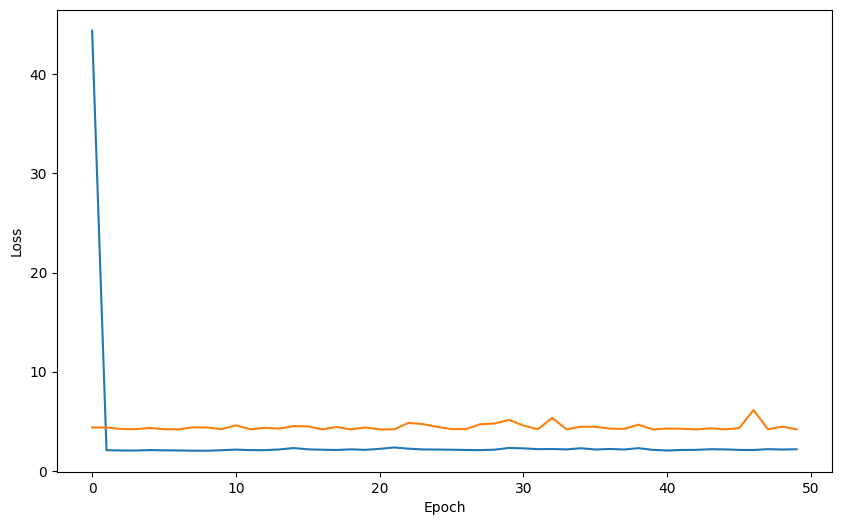

In [462]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Ошибка на обучающей выборке')
plt.plot(history.history['val_loss'], label='Ошибка на тестовой выборке')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [463]:
y_pred = model.predict(X_test)

104/104 [==============================] - 0s 1ms/step


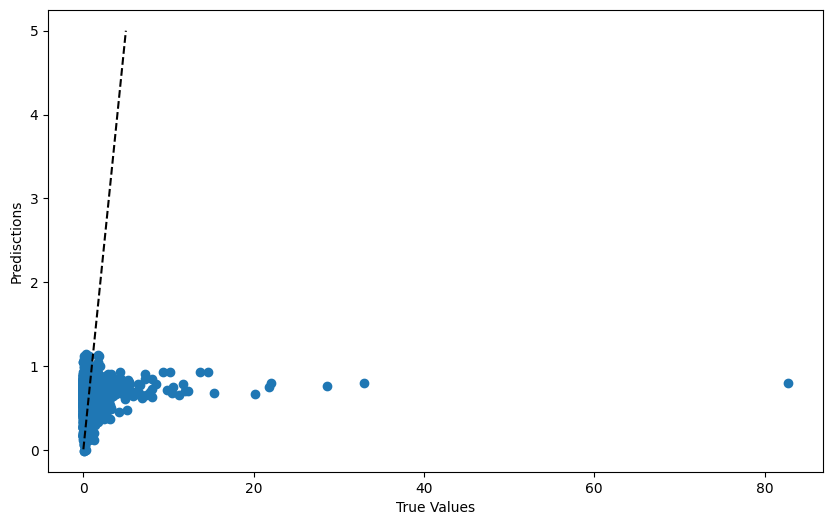

In [471]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), 5], [min(y_test), 5], '--k')
plt.xlabel('True Values')
plt.ylabel('Predisctions')
plt.show()